Task 19

**Table of Contents**

1. Introduction to Chicago Crime Dataset
2. Dataset Setup and Loading
3. Preliminary Data Analysis
4. Data Cleaning and Preprocessing
5. Exploratory Data Analysis(EDA)
   - Crime Trend Analysis(Trend, seasonality, time series)
   - Spatial Analysis
   - Crime Type Analysis
8. Advanced Analytics and General Wrangling
9. Visualization with Pandas



#### **Introduction**

The Chicago Crime dataset is one of the most comprehensive public crime datasets available, containing reported incidents from the Chicago Police Department's CLEAR system since 2001. The dataset contains 7+ million records, from 2001 to present. It is usually updated daily (minus recent 7 days for investigation purposes). It cover all Chicago neighborhoods and it is a high-quality and standardized police records.

**Dataset Schema**

- ID - Unique identifier for the record.

- Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

- Date - Date when the incident occurred. this is sometimes a best estimate.

- Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

- IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

- Primary Type - The primary description of the IUCR code.

- Description - The secondary description of the IUCR code, a subcategory of the primary description.

- Location Description - Description of the location where the incident occurred.

- Arrest - Indicates whether an arrest was made.

- Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

- Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

- Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

- Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

- FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

-  Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- Year - Year the incident occurred.

- Updated On - Date and time the record was last updated.

- Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

**Data Source:**_https://www.kaggle.com/datasets/utkarshx27/crimes-2001-to-present?resource=download_

### Importing Libraries

In [5]:
# Libraries for wrangling
import pandas as pd
import numpy as np

# Libraries for visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for statistics
from scipy import stats
import gdown

# Libraries for time
from datetime import datetime, timedelta

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


### **Loading the Dataset**

In [ ]:
# # Importing from Google drive
# raw_link = 'https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing'

# id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"

# gdown.download(f"https://drive.google.com/uc?id={id}", "archive.zip", quiet=False)

# Run to view the file

In [6]:
# Reading the dataset
d = pd.read_csv('archive.zip')


In [10]:
d.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [7]:
# Creating a copy of the dataset
data = d.copy()
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
# # Function to load data fast
# def load_data(data_path, sample=None):
#   dtype_dict = {
#     'ID': 'Int32',
#     'Case Number': 'string',
#     'IUCR': 'category',
#     'Primary Type': 'category',
#     'Description': 'category',
#     'Location Description': 'category',
#     'Arrest': 'bool',
#     'Domestic': 'bool',
#     'Beat': 'Int16',
#     'District': 'Int8',
#     'Ward': 'Int8',
#     'Community Area': 'Int8',
#     'FBI Code': 'category',
#     'X Coordinate': 'float32',
#     'Y Coordinate': 'float32',
#     'Latitude': 'float32',
#     'Longitude': 'float32'
#   }

#   # Parse dates during loading
#   date_cols = ['Date', 'Updated On']

# data = load_data('archive.zip', sample=7000000)
    

### Preliminary Analysis

In [39]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
data.shape

(7784664, 22)

In [21]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [60]:
# Replacing space with _ in column names
data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
data.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [58]:
data.describe(include='all')

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7784664,7784664,7.784664e+06,7.784617e+06,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,2,2,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,5749900,6708370,NaN,NaN,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185918e+03,1.129466e+01,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.031335e+02,6.952422e+00,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


In [ ]:
# Check the data for duplicates
data.duplicated().sum()

np.int64(0)

In [29]:
empty = data.isna().sum().sort_values
print("The Empty cells are", empty)

The Empty cells are <bound method Series.sort_values of ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
Month                        0
day                          0
dtype: int64>


In [43]:
data.dropna(inplace= True)

In [44]:

# To check the type of data for Date
print(data['Date'].dtype)

# Convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Add day, year and month to the columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data.head()

datetime64[ns]


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,day
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",9,5
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",9,5
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",9,5
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",9,5


In [46]:
data.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
day                     0
dtype: int64

### Data Analysis

The crime years in the Chicago dataset are
 [2015 2014 2020 2019 2021 2012 2011 2013 2010 2017 2018 2016 2008 2007
 2009 2023 2022 2006 2005 2002 2001 2003 2004]
The crimes and how they occured each years are
 Year
2003    471995
2004    467132
2005    449868
2006    445499
2007    435532
2008    419794
2009    385849
2010    369805
2011    350905
2002    345026
2012    335099
2013    306325
2014    273610
2016    266482
2017    264156
2018    262835
2019    258161
2015    257788
2022    232552
2020    207439
2021    202246
2023     72449
2001      3888
Name: count, dtype: int64


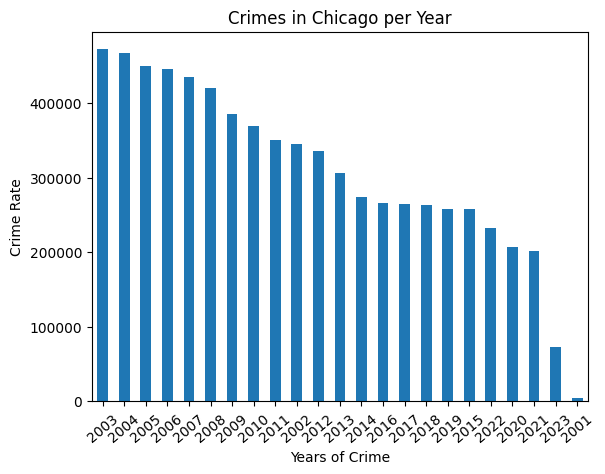

In [69]:
year_crime = data['Year'].unique()
print("The crime years in the Chicago dataset are\n", year_crime)

year_crime = data['Year'].value_counts()
print("The crimes and how they occured each years are\n", year_crime)

year_crime.plot(kind='bar', xlabel='Years of Crime', ylabel='Crime Rate', title='Crimes in Chicago per Year')
plt.xticks(rotation = 40)
plt.show()

From the Analysis above, it is visible that the year that most of the crimes were committed was the year 2003 with 471,995 crimes excluding the empty rows that have been dropped from the dataset.

Year 2001 has less crimes with just 3,888 crimes. Now we can analyze further to get more insights on the years

In [82]:
# Check for Month with most crime in the year with highest crime rate

crime_2003 = data[data['Year'] == 2003]
crime_2003.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,day
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2003,02/10/2018 03:50:01 PM,41.815117,-87.6700,"(41.815117282, -87.669999562)",9,5
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2003,02/10/2018 03:50:01 PM,41.895080,-87.7654,"(41.895080471, -87.765400451)",9,4


In [127]:
high_crime_month = crime_2003['Month'].value_counts()
print(f"Month with highest crime Rate \n{high_crime_month}")

Month with highest crime Rate 
Month
7     665724
8     658995
5     635656
6     633272
10    624718
9     619847
4     569734
3     567379
11    561296
1     538737
12    533200
2     475877
Name: count, dtype: int64


The 7th Month which is the month of July has the highest crime rate

In [129]:
high_crime_month = data[data['Month'] == 7]
high_crime_month.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,day
17,10224756,HY410094,2015-07-08 00:00:00,103XX S TORRENCE AVE,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,434,4.0,10.0,51.0,05,1195508.0,1836950.0,2003,02/10/2018 03:50:01 PM,41.707490,-87.559650,"(41.707490122, -87.559650325)",7,8
167,10224937,HY411880,2015-07-07 22:06:00,022XX W 19TH ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,1234,12.0,25.0,31.0,26,1161681.0,1890701.0,2003,02/10/2018 03:50:01 PM,41.855757,-87.682034,"(41.855757398, -87.682034455)",7,7
556,10136852,HY325238,2015-07-02 15:15:00,033XX S OAKLEY AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,912,9.0,12.0,59.0,05,1161567.0,1882403.0,2003,02/10/2018 03:50:01 PM,41.832989,-87.682684,"(41.832989182, -87.682683638)",7,2
727,10225605,HY412867,2012-07-11 09:00:00,017XX W ALBION AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2432,24.0,40.0,1.0,11,1163498.0,1943889.0,2003,02/10/2018 03:50:01 PM,42.001670,-87.673864,"(42.00167049, -87.673863642)",7,11
771,10225664,HY412931,2015-07-08 10:00:00,058XX W WASHINGTON BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,1512,15.0,29.0,25.0,14,1137563.0,1900156.0,2003,02/10/2018 03:50:01 PM,41.882171,-87.770333,"(41.882171121, -87.770332732)",7,8


In [132]:

print("The total number of crimes in the month of July:", high_crime_month['Primary Type'].nunique())
high_crime_month['Primary Type'].value_counts()



The total number of crimes in the month of July: 35


Primary Type
THEFT                                147983
BATTERY                              127264
CRIMINAL DAMAGE                       77766
NARCOTICS                             56865
ASSAULT                               44735
OTHER OFFENSE                         38643
BURGLARY                              36668
MOTOR VEHICLE THEFT                   29942
DECEPTIVE PRACTICE                    25657
ROBBERY                               25464
CRIMINAL TRESPASS                     16906
WEAPONS VIOLATION                      9410
PROSTITUTION                           5291
PUBLIC PEACE VIOLATION                 4494
OFFENSE INVOLVING CHILDREN             4111
SEX OFFENSE                            2685
CRIM SEXUAL ASSAULT                    2393
GAMBLING                               1855
INTERFERENCE WITH PUBLIC OFFICER       1750
HOMICIDE                               1360
ARSON                                  1224
LIQUOR LAW VIOLATION                   1173
CRIMINAL SEXUAL ASS

**Summary**

2003 is the year with the highest crime rate with crimes occuring most in the 7th month which is the month of July and the crime that appear to occur most is Theft with about 147, 983 crimes in the month of July.

In [148]:
# Check where the theft occured most in the location description
# theft_loc = high_crime_month.groupby('Location Description').value_counts()
theft_loc = high_crime_month['Location Description'].value_counts()
print(f"Top 5 Locations where the thefts occur in the month of July")
theft_loc.head()

Top 5 Locations where the thefts occur in the month of July


Location Description
STREET       177096
RESIDENCE    105484
APARTMENT     73935
SIDEWALK      72710
OTHER         22905
Name: count, dtype: int64

In [135]:
# Analyze crime season patterns
def analyze_seasonality(data):

  # Defining the seasons
  def get_season(month):
      if month in [12, 1, 2]:
        return 'Winter'
      elif month in [3, 4, 5]:
          return 'Spring'
      elif month in [6, 7, 8]:
          return 'Summer'
      else:
        return 'Fall'
  
  data['Season'] = data['Month'].apply(get_season)


  # Seasonal Crime anlysis
  seasonal_crimes = data.groupby(['Season', 'Primary Type']).size().unstack(fill_value=0)
    
  print("=== Crime Season Analysis ===")
  print("Top 5 crimes by season:")
  for season in ['Spring', 'Summer', 'Fall', 'Winter']:
      print(f"\n{season}:")
      season_total = seasonal_crimes.loc[season].sort_values(ascending=False)
      print(season_total.head())
  print("Crime seasonal analysis completed!")
  return seasonal_crimes

seasonal_data = analyze_seasonality(data)

=== Crime Season Analysis ===
Top 5 crimes by season:

Spring:
Primary Type
THEFT              355030
BATTERY            339484
CRIMINAL DAMAGE    207806
NARCOTICS          173106
ASSAULT            122205
Name: Spring, dtype: int64

Summer:
Primary Type
THEFT              428849
BATTERY            373775
CRIMINAL DAMAGE    227762
NARCOTICS          169673
ASSAULT            132318
Name: Summer, dtype: int64

Fall:
Primary Type
THEFT              392848
BATTERY            319624
CRIMINAL DAMAGE    211538
NARCOTICS          166674
ASSAULT            116406
Name: Fall, dtype: int64

Winter:
Primary Type
THEFT              322470
BATTERY            266976
CRIMINAL DAMAGE    164799
NARCOTICS          159644
OTHER OFFENSE      104645
Name: Winter, dtype: int64
Crime seasonal analysis completed!


In [151]:
# Check where the theft occured most in the location description
# theft_loc = high_crime_month.groupby('Location Description').value_counts()
theft_loc = high_crime_month['Location Description'].value_counts()
print(f"Top 5 Locations where the thefts occur in the month of July")
theft_loc.head()

Top 5 Locations where the thefts occur in the month of July


Location Description
STREET       177096
RESIDENCE    105484
APARTMENT     73935
SIDEWALK      72710
OTHER         22905
Name: count, dtype: int64

In [ ]:
# Lets check how effective the chicago police department were in that month if they had enough succefull arrest of the perpetrators
arrest_rate = high_crime_month['Arrest'].value_counts()
arrest_rate_perc = arrest_rate
arrest_rate.head()

# high_crime_month

Arrest
False    501577
True     164147
Name: count, dtype: int64

In [ ]:
# Chec

In [20]:
print(data['Primary Type'])

0                     BATTERY
1                       THEFT
2                       THEFT
3                   NARCOTICS
4                     ASSAULT
                  ...        
7784659         OTHER OFFENSE
7784660    DECEPTIVE PRACTICE
7784661                 THEFT
7784662             NARCOTICS
7784663     WEAPONS VIOLATION
Name: Primary Type, Length: 7784664, dtype: object
